# Self-Driving Car Engineer Nanodegree

## Deep Learning

## Project: Build a Traffic Sign Recognition Classifier

In this notebook, a template is provided for you to implement your functionality in stages, which is required to successfully complete this project. If additional code is required that cannot be included in the notebook, be sure that the Python code is successfully imported and included in your submission if necessary. 

> **Note**: Once you have completed all of the code implementations, you need to finalize your work by exporting the iPython Notebook as an HTML document. Before exporting the notebook to html, all of the code cells need to have been run so that reviewers can see the final implementation and output. You can then export the notebook by using the menu above and navigating to  \n",
    "**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission. 

In addition to implementing code, there is a writeup to complete. The writeup should be completed in a separate file, which can be either a markdown file or a pdf document. There is a [write up template](https://github.com/udacity/CarND-Traffic-Sign-Classifier-Project/blob/master/writeup_template.md) that can be used to guide the writing process. Completing the code template and writeup template will cover all of the [rubric points](https://review.udacity.com/#!/rubrics/481/view) for this project.

The [rubric](https://review.udacity.com/#!/rubrics/481/view) contains "Stand Out Suggestions" for enhancing the project beyond the minimum requirements. The stand out suggestions are optional. If you decide to pursue the "stand out suggestions", you can include the code in this Ipython notebook and also discuss the results in the writeup file.


>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

---
## Step 0: Load The Data

In [9]:
# Load pickled data
import pickle

# TODO: Fill this in based on where you saved the training and testing data

training_file = 'traffic-signs-data/train.p'
validation_file = 'traffic-signs-data/valid.p'
testing_file = 'traffic-signs-data/test.p'

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
with open(testing_file, mode='rb') as f:
    test = pickle.load(f)
    
X_train, y_train = train['features'], train['labels']
X_valid, y_valid = valid['features'], valid['labels']
X_test, y_test = test['features'], test['labels']

---

## Step 1: Dataset Summary & Exploration

The pickled data is a dictionary with 4 key/value pairs:

- `'features'` is a 4D array containing raw pixel data of the traffic sign images, (num examples, width, height, channels).
- `'labels'` is a 1D array containing the label/class id of the traffic sign. The file `signnames.csv` contains id -> name mappings for each id.
- `'sizes'` is a list containing tuples, (width, height) representing the original width and height the image.
- `'coords'` is a list containing tuples, (x1, y1, x2, y2) representing coordinates of a bounding box around the sign in the image. **THESE COORDINATES ASSUME THE ORIGINAL IMAGE. THE PICKLED DATA CONTAINS RESIZED VERSIONS (32 by 32) OF THESE IMAGES**

Complete the basic data summary below. Use python, numpy and/or pandas methods to calculate the data summary rather than hard coding the results. For example, the [pandas shape method](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.shape.html) might be useful for calculating some of the summary results. 

### Provide a Basic Summary of the Data Set Using Python, Numpy and/or Pandas

In [10]:
print(X_train.shape, y_train.shape)
print(X_train.shape[-3:])
print(type(X_train), type(y_train))

(34799, 32, 32, 3) (34799,)
(32, 32, 3)
<class 'numpy.ndarray'> <class 'numpy.ndarray'>


In [11]:
import numpy as np

In [12]:
### Replace each question mark with the appropriate value. 
### Use python, pandas or numpy methods rather than hard coding the results

# TODO: Number of training examples
n_train = X_train.shape[0]

# TODO: Number of validation examples
n_validation = X_valid.shape[0]

# TODO: Number of testing examples.
n_test = X_test.shape[0]

# TODO: What's the shape of an traffic sign image?
image_shape = X_train.shape[-3:]

# TODO: How many unique classes/labels there are in the dataset.
unique_classes = np.unique(y_train)
n_classes = len(unique_classes)

print("Number of training examples =", n_train)
print("Number of validation examples =", n_validation)
print("Number of testing examples =", n_test)
print("Image data shape =", image_shape)
print("Number of classes =", n_classes)

Number of training examples = 34799
Number of validation examples = 4410
Number of testing examples = 12630
Image data shape = (32, 32, 3)
Number of classes = 43


### Include an exploratory visualization of the dataset

Visualize the German Traffic Signs Dataset using the pickled file(s). This is open ended, suggestions include: plotting traffic sign images, plotting the count of each sign, etc. 

The [Matplotlib](http://matplotlib.org/) [examples](http://matplotlib.org/examples/index.html) and [gallery](http://matplotlib.org/gallery.html) pages are a great resource for doing visualizations in Python.

**NOTE:** It's recommended you start with something simple first. If you wish to do more, come back to it after you've completed the rest of the sections. It can be interesting to look at the distribution of classes in the training, validation and test set. Is the distribution the same? Are there more examples of some classes than others?

In [44]:
import pandas as pd
import matplotlib.pyplot as plt
# Visualizations will be shown in the notebook.
%matplotlib inline

From the following figure, we can see the class distribution is similar for train, validation and test dataset.

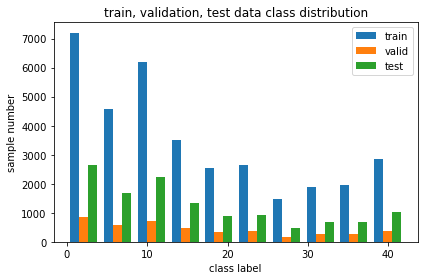

In [15]:
# the script is from https://matplotlib.org/stable/gallery/statistics/histogram_multihist.html
n_bins = 10
fig, ax = plt.subplots()
x_multi = [y_train, y_valid, y_test]
ax.hist(x_multi, n_bins, histtype='bar')
ax.set_title('train, validation, test data class distribution')
ax.set_xlabel('class label')
ax.set_ylabel('sample number')
ax.legend(['train', 'valid', 'test'])
fig.tight_layout()
plt.show()

#### show label and image pairs

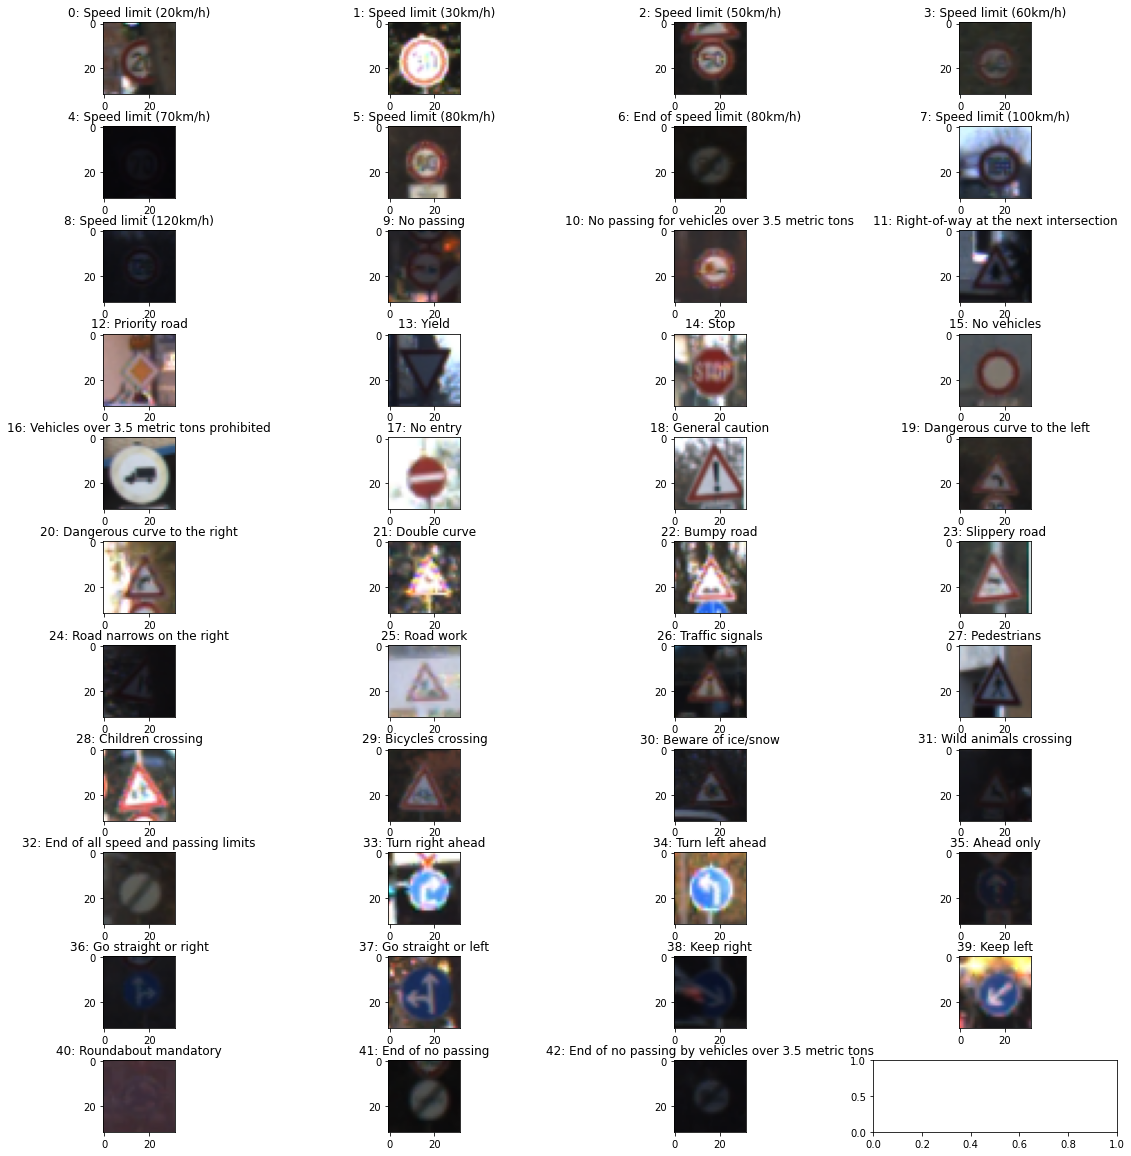

In [45]:
csvFile = pd.read_csv('signnames.csv')
f, axes = plt.subplots(11, 4, figsize=(16, 16))
f.tight_layout()
_, indices = np.unique(y_valid, return_index=True)
labels = csvFile['SignName']
for ax_index in range(11):
    for index in range(4):
        id = ax_index * 4 + index
        if id >= len(labels):
            break
        axes[ax_index, index].imshow(X_valid[indices[id]])
        axes[ax_index, index].set_title('{}: {}'.format(id, labels[id]))

----

## Step 2: Design and Test a Model Architecture

Design and implement a deep learning model that learns to recognize traffic signs. Train and test your model on the [German Traffic Sign Dataset](http://benchmark.ini.rub.de/?section=gtsrb&subsection=dataset).

The LeNet-5 implementation shown in the [classroom](https://classroom.udacity.com/nanodegrees/nd013/parts/fbf77062-5703-404e-b60c-95b78b2f3f9e/modules/6df7ae49-c61c-4bb2-a23e-6527e69209ec/lessons/601ae704-1035-4287-8b11-e2c2716217ad/concepts/d4aca031-508f-4e0b-b493-e7b706120f81) at the end of the CNN lesson is a solid starting point. You'll have to change the number of classes and possibly the preprocessing, but aside from that it's plug and play! 

With the LeNet-5 solution from the lecture, you should expect a validation set accuracy of about 0.89. To meet specifications, the validation set accuracy will need to be at least 0.93. It is possible to get an even higher accuracy, but 0.93 is the minimum for a successful project submission. 

There are various aspects to consider when thinking about this problem:

- Neural network architecture (is the network over or underfitting?)
- Play around preprocessing techniques (normalization, rgb to grayscale, etc)
- Number of examples per label (some have more than others).
- Generate fake data.

Here is an example of a [published baseline model on this problem](http://yann.lecun.com/exdb/publis/pdf/sermanet-ijcnn-11.pdf). It's not required to be familiar with the approach used in the paper but, it's good practice to try to read papers like these.

### create dataloader from loaded numpy arrays

In [6]:
import torch
from torch.utils.data import TensorDataset, DataLoader
import torchvision.transforms as transforms
import torch.nn.functional as F

In [218]:
class MyDataset(Dataset):
    def __init__(self, data, target, transform=None):
        # permute is used to change channel dimension position, so that Normalize can be applied.
        self.data = torch.from_numpy(data / 255).permute(0, 3, 1, 2).float()
        self.target = torch.from_numpy(target).long()
        self.transform = transform
        
    def __getitem__(self, index):
        x = self.data[index]
        y = self.target[index]
        
        if self.transform:
            x = self.transform(x)
        
        return x, y
    
    def __len__(self):
        return len(self.data)

### pre-process the data set (normalization)

Minimally, the image data should be normalized so that the data has mean zero and equal variance. For image data, `(pixel - 128)/ 128` is a quick way to approximately normalize the data and can be used in this project. 

Other pre-processing steps are optional. You can try different techniques to see if it improves performance. 

Use the code cell (or multiple code cells, if necessary) to implement the first step of your project.

In [219]:
# calculate mean and std value for data, which will be used in DataLoader transforms.
# also, the same mean and std value will be used to normalize test and validation data.
# Deep Learning with PyTorch, p171.
X_train_torch = torch.from_numpy(X_train / 255).float()
# X_train.shape: torch.Size([34799, 32, 32, 3])
print(X_train_torch.view(-1, 3).mean(dim=0))
print(X_train_torch.view(-1, 3).std(dim=0))

tensor([0.3400, 0.3117, 0.3209])
tensor([0.2717, 0.2599, 0.2658])


In [238]:
# for the pytorch version I used here, horizontal flip has to be used on pil image.
# RandomHorizontalFlip() can not be used, because meaning of traffic sign may change.
# transform_train = transforms.Compose([
#     transforms.Normalize(mean=(0.3400, 0.3117, 0.3209), std=(0.2717, 0.2599, 0.2658))
# ])
train = MyDataset(X_train, y_train, transform=None)
valid = MyDataset(X_valid, y_valid, transform=None)
test = MyDataset(X_test, y_test, transform=None)

In [239]:
# the normalized 1000th sample
img_t, label = train[1000]
print(img_t, label)

tensor([[[0.0706, 0.0824, 0.0824,  ..., 0.1843, 0.2039, 0.2275],
         [0.0784, 0.0706, 0.0745,  ..., 0.1882, 0.2118, 0.2196],
         [0.0588, 0.0627, 0.0667,  ..., 0.1922, 0.2039, 0.2078],
         ...,
         [0.0902, 0.0824, 0.0667,  ..., 0.0784, 0.1176, 0.1922],
         [0.1020, 0.0824, 0.0627,  ..., 0.0667, 0.1059, 0.1686],
         [0.1059, 0.0863, 0.0667,  ..., 0.0588, 0.0980, 0.1373]],

        [[0.0706, 0.0784, 0.0745,  ..., 0.2235, 0.2275, 0.2314],
         [0.0784, 0.0706, 0.0706,  ..., 0.2275, 0.2353, 0.2235],
         [0.0588, 0.0627, 0.0667,  ..., 0.2314, 0.2314, 0.2157],
         ...,
         [0.0784, 0.0706, 0.0549,  ..., 0.1294, 0.1922, 0.2353],
         [0.0784, 0.0667, 0.0549,  ..., 0.1176, 0.1804, 0.2118],
         [0.0706, 0.0667, 0.0627,  ..., 0.1098, 0.1686, 0.1882]],

        [[0.0824, 0.0902, 0.0863,  ..., 0.2706, 0.2549, 0.2431],
         [0.0902, 0.0784, 0.0863,  ..., 0.2784, 0.2627, 0.2314],
         [0.0667, 0.0667, 0.0824,  ..., 0.2824, 0.2627, 0.

### model architecture

In [1]:
# use lenet in pytorch, which I refered to https://github.com/kuangliu/pytorch-cifar/blob/master/models/lenet.py
# the same implementation is https://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html
import torch.nn as nn
import torch.optim as optim

In [2]:
class LeNet(nn.Module):
    def __init__(self):
        super(LeNet, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, kernel_size=5)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.fc1 = nn.Linear(16*5*5, 120)
        self.fc2 = nn.Linear(120, 84)
        # change the output class number to 43.
        self.fc3 = nn.Linear(84, 43)
        
    def forward(self, x):
        out = F.relu(self.conv1(x))
        out = F.max_pool2d(out, kernel_size=2)
        out = F.relu(self.conv2(out))
        out = F.max_pool2d(out, kernel_size=2)
        out = out.view(out.size(0), -1)
        out = F.relu(self.fc1(out))
        out = F.relu(self.fc2(out))
        out = self.fc3(out)
        return out

In [3]:
class LeNetRevised(nn.Module):
    def __init__(self):
        super(LeNetRevised, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, kernel_size=5)
        self.bn1 = nn.BatchNorm2d(num_features=6)
        self.conv2 = nn.Conv2d(6, 16, kernel_size=5)
        self.bn2 = nn.BatchNorm2d(num_features=16)
        self.fc1 = nn.Linear(16*5*5, 120)
        # change the output class number to 43.
        self.fc2 = nn.Linear(120, 43)
        
    def forward(self, x):
        out = F.relu(self.bn1(self.conv1(x)))
        out = F.max_pool2d(out, kernel_size=2)
        out = F.relu(self.bn2(self.conv2(out)))
        out = F.max_pool2d(out, kernel_size=2)
        out = out.view(out.size(0), -1)
        out = F.relu(self.fc1(out))
        out = self.fc2(out)
        return out

In [4]:
model_for_print = LeNetRevised()
print(model_for_print)

LeNetRevised(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (bn1): BatchNorm2d(6, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (bn2): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=43, bias=True)
)


### Train, Validate and Test the Model

A validation set can be used to assess how well the model is performing. A low accuracy on the training and validation sets imply underfitting. A high accuracy on the training set but low accuracy on the validation set implies overfitting.

#### see if cuda is available

In [225]:
device = (torch.device('cuda') if torch.cuda.is_available()
         else torch.device('cpu'))
print(f"Training on device {device}.")

Training on device cuda.


#### training

In [240]:
import datetime

def training_loop(n_epochs, optimizer, model, loss_fn, train_loader, valid_loader):
    for epoch in range(1, n_epochs + 1):
        loss_train = 0.0
        model.train() # needed when using dropout, batchnorm etc. which behave different for train and test.
        for imgs, labels in train_loader:
            imgs = imgs.to(device=device)
            labels = labels.to(device=device)
            outputs = model(imgs)
            loss = loss_fn(outputs, labels)
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
            loss_train += loss.item()
        if epoch == 1 or epoch % 10 == 0:
            print('{} Epoch {}, Training loss {}'.format(
            datetime.datetime.now(), epoch, loss_train / len(train_loader)))
            # see validation loss
            loss_valid = 0.0
            model.eval() # needed when using dropout, batchnorm, etc. which behave differently for train and test.
            for imgs, labels in valid_loader:
                imgs = imgs.to(device=device)
                labels = labels.to(device=device)
                outputs = model(imgs)
                loss = loss_fn(outputs, labels)
                loss_valid += loss.item()
            print('{} Epoch {}, Validation loss {}'.format(
            datetime.datetime.now(), epoch, loss_valid / len(valid_loader)))

In [241]:
train_loader = torch.utils.data.DataLoader(train, batch_size=64, shuffle=True)
valid_loader = torch.utils.data.DataLoader(valid, batch_size=64, shuffle=False)
model = LeNetRevised().to(device=device)
optimizer = optim.SGD(model.parameters(), lr=1e-2)
loss_fn = nn.CrossEntropyLoss()

training_loop(n_epochs=70,
             optimizer=optimizer,
             model=model,
             loss_fn=loss_fn,
             train_loader=train_loader,
             valid_loader=valid_loader)

2021-05-03 16:16:50.422295 Epoch 1, Training loss 2.5332496082958054
2021-05-03 16:16:50.484655 Epoch 1, Validation loss 1.8673603760240518
2021-05-03 16:16:59.059145 Epoch 10, Training loss 0.12181618426214247
2021-05-03 16:16:59.121605 Epoch 10, Validation loss 0.3604660544336751
2021-05-03 16:17:08.643039 Epoch 20, Training loss 0.0480877024563276
2021-05-03 16:17:08.704729 Epoch 20, Validation loss 0.27919770677683936
2021-05-03 16:17:18.230893 Epoch 30, Training loss 0.027576817993523198
2021-05-03 16:17:18.292910 Epoch 30, Validation loss 0.20716449165465714
2021-05-03 16:17:27.746177 Epoch 40, Training loss 0.017025907078812665
2021-05-03 16:17:27.807484 Epoch 40, Validation loss 0.21212075774883343
2021-05-03 16:17:37.298334 Epoch 50, Training loss 0.011928807370542712
2021-05-03 16:17:37.359201 Epoch 50, Validation loss 0.21507975222485196
2021-05-03 16:17:46.897243 Epoch 60, Training loss 0.008326456169550725
2021-05-03 16:17:46.958771 Epoch 60, Validation loss 0.217169045995

#### compare train and test accuracy

In [242]:
train_loader = torch.utils.data.DataLoader(train, batch_size=64, shuffle=False)
test_loader = torch.utils.data.DataLoader(test, batch_size=64, shuffle=False)

def validate(model, train_loader, test_loader):
    model.eval()
    for name, loader in [("train", train_loader), ("test", test_loader)]:
        correct = 0
        total = 0
        
        with torch.no_grad():
            for imgs, labels in loader:
                outputs = model(imgs)
                _, predicted = torch.max(outputs, dim=1)
                total += labels.shape[0]
                correct += int((predicted == labels).sum())
        
        print("Accuracy {}: {:.2f}".format(name, correct / total))

validate(model.to(device=torch.device('cpu')), train_loader=train_loader, test_loader=test_loader)

Accuracy train: 1.00
Accuracy test: 0.93


#### save checkpoint

In [276]:
# https://pytorch.org/tutorials/beginner/saving_loading_models.html#saving-loading-model-for-inference
torch.save(model.state_dict(), 'checkpoint/model.pth')

#### only for comparison: the training of LeNet

When using LeNet(), training and validation loss are as follows:<br>
2021-05-02 22:08:40.502163 Epoch 1, Training loss 3.681249815313255<br>
2021-05-02 22:08:40.738569 Epoch 1, Validation loss 3.5540611951247505<br>
2021-05-02 22:09:01.714989 Epoch 10, Training loss 0.25960961160907414<br>
2021-05-02 22:09:01.944401 Epoch 10, Validation loss 0.6704699076188302<br>
2021-05-02 22:09:24.792496 Epoch 20, Training loss 0.0759098684442613<br>
2021-05-02 22:09:25.036044 Epoch 20, Validation loss 0.7553054996671456<br>
2021-05-02 22:09:48.840837 Epoch 30, Training loss 0.03433142837200327<br>
2021-05-02 22:09:49.083959 Epoch 30, Validation loss 0.799466978511191<br>
2021-05-02 22:10:12.011242 Epoch 40, Training loss 0.012629777006382296<br>
2021-05-02 22:10:12.255575 Epoch 40, Validation loss 0.793002588475082<br>
2021-05-02 22:10:35.434731 Epoch 50, Training loss 0.00649220284391477<br>
2021-05-02 22:10:35.685258 Epoch 50, Validation loss 0.8635707994259308<br>
2021-05-02 22:10:59.051351 Epoch 60, Training loss 0.0033305433884018333<br>
2021-05-02 22:10:59.297759 Epoch 60, Validation loss 0.9724893150667901<br>
2021-05-02 22:11:22.387388 Epoch 70, Training loss 0.0032781166281465094<br>
2021-05-02 22:11:22.621158 Epoch 70, Validation loss 0.9715800472237073

---

## Step 3: Test a Model on New Images

To give yourself more insight into how your model is working, download at least five pictures of German traffic signs from the web and use your model to predict the traffic sign type.

You may find `signnames.csv` useful as it contains mappings from the class id (integer) to the actual sign name.

### Load and Output the Images

In [13]:
### Load the images and plot them here.
### Feel free to use as many code cells as needed.
import glob
from PIL import Image

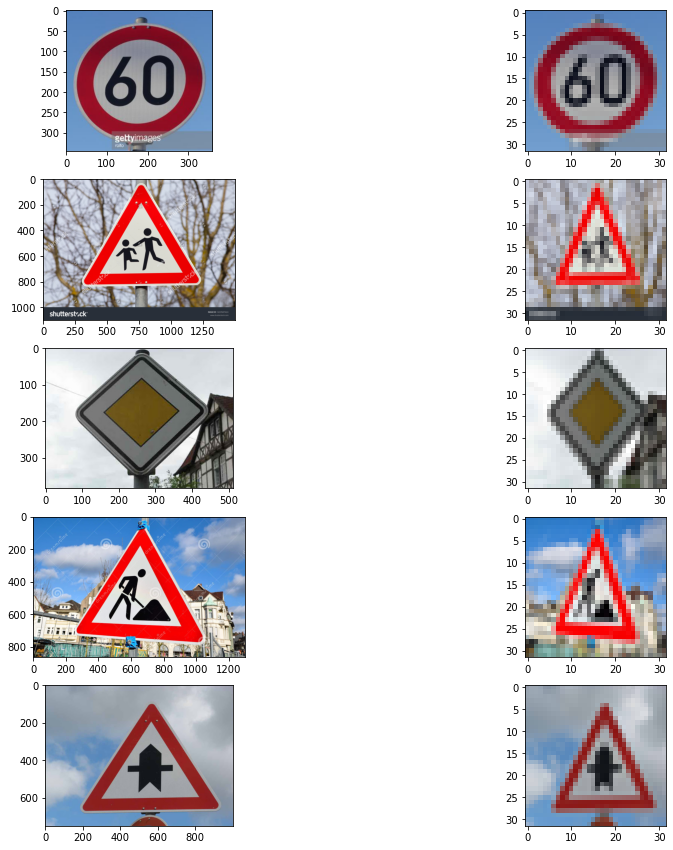

In [14]:
img_names = glob.glob('test-images/*.jpg')
f, axes = plt.subplots(len(img_names), 2, figsize=(15, 15))
new_size = (32, 32)
resized_imgs = []
for img_name, ax in zip(img_names, axes):
    img = Image.open(img_name)
    ax[0].imshow(img)
    img_resized = img.resize(new_size)
    resized_imgs.append(img_resized)
    ax[1].imshow(img_resized)

### Predict the Sign Type for Each Image

In [15]:
### Run the predictions here and use the model to output the prediction for each image.
### Make sure to pre-process the images with the same pre-processing pipeline used earlier.
### Feel free to use as many code cells as needed.
resized_imgs

[<PIL.Image.Image image mode=RGB size=32x32 at 0x7FA239789970>,
 <PIL.Image.Image image mode=RGB size=32x32 at 0x7FA23972F100>,
 <PIL.Image.Image image mode=RGB size=32x32 at 0x7FA2397024C0>,
 <PIL.Image.Image image mode=RGB size=32x32 at 0x7FA239702E20>,
 <PIL.Image.Image image mode=RGB size=32x32 at 0x7FA2396972E0>]

#### convert PIL image list to tensor of shape (5, 3, 32, 32)

In [16]:
data_transform = transforms.Compose([
    transforms.ToTensor(),
])
normalized_imgs = []
for img in resized_imgs:
    normalized_img = data_transform(img)
    normalized_imgs.append(normalized_img)
normalized_imgs = torch.stack(normalized_imgs)

In [17]:
normalized_imgs.shape

torch.Size([5, 3, 32, 32])

#### Output Top 5 Softmax Probabilities For Each Image Found on the Web

In [18]:
model = LeNetRevised()
model.load_state_dict(torch.load('checkpoint/model.pth'))
model.eval()
outputs = model(normalized_imgs)
probs = F.softmax(outputs, dim=1)
values, inds = torch.topk(probs, 5)
print(values)
print(inds)

tensor([[1.0000e+00, 3.4132e-19, 3.2332e-19, 4.2221e-20, 2.6393e-21],
        [9.9988e-01, 7.7522e-05, 3.4883e-05, 7.0886e-06, 3.2687e-06],
        [1.0000e+00, 5.6886e-13, 7.6746e-14, 5.2081e-17, 3.7606e-17],
        [1.0000e+00, 1.1250e-08, 8.6519e-12, 2.5753e-13, 3.8149e-14],
        [1.0000e+00, 4.3172e-12, 1.4027e-12, 6.1071e-14, 2.2836e-14]],
       grad_fn=<TopkBackward>)
tensor([[ 3, 19,  5,  2, 23],
        [31, 25, 11, 29, 20],
        [12,  6, 32, 41, 36],
        [25, 21, 22,  4, 20],
        [11, 21, 30, 19, 27]])


### Analyze Performance

The prediction with highest probability for 5 images are `3, 31, 12, 25, 11`, which means (1) Speed limit (60km/h), (2) Wild animals crossing, (3) Priority road, (4) Road work and (5) Right-of-way at the next intersection. <br>
**the 2nd image prediction is wrong, so the accuracy is 80%**. The 2nd image should be 28: Children crossing.